In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('btc_data.csv')
df.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [3]:
df_new=df.iloc[:,1:]

In [4]:
df_new.head(5)

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


### Dropping the priceUSD column and storing it in 'y'

In [5]:
df1=df_new.reset_index(drop=True)
n=df1.drop('priceUSD',1)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_6320\646315669.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  n=df1.drop('priceUSD',1)


In [6]:
y=df1[['priceUSD']]
y

,priceUSD
0,0.0495
1,0.0726
2,0.0859
3,0.0783
4,0.0767
...,...
3483,9349.0000
3484,9394.0000
3485,9366.0000
3486,9393.0000


### Reading the YeoJohnson PCA dataset

In [7]:
minmaxPCA=pd.read_csv('PCA_YeoJohnson_data2.csv')
#Adding the y column to this dataset
combined_data=minmaxPCA.assign(priceUSD=y)
combined_data.head()

,Unnamed: 0,0,priceUSD
0,0,-4.776250,0.0495
1,1,-4.697100,0.0726
2,2,-4.730371,0.0859
3,3,-4.735657,0.0783
4,4,-4.592963,0.0767


### Dropping the first unnamed column

In [8]:
finaldata = combined_data.iloc[: , 1:]
finaldata

,0,priceUSD
0,-4.776250,0.0495
1,-4.697100,0.0726
2,-4.730371,0.0859
3,-4.735657,0.0783
4,-4.592963,0.0767
...,...,...
1551,3.759910,393.7880
1552,3.375542,386.2650
1553,3.043351,379.4510
1554,3.061657,384.7020


In [9]:
X = finaldata.iloc[:, :-1].values
y = finaldata.iloc[:, -1].values


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Training the Linear Regression model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = regressor.predict(X_test)

### Accuracy on linear regression

In [13]:
train_score = regressor.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = regressor.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 7.703270853945976
Test score of trained model: 7.563442750841443


In [14]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
MAPE = np.mean(np.abs( (y_test-y_pred) / y_test))*100
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

In [15]:
results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,46416.950642
1,RMSE,215.445934
2,MAE,158.726310
3,MAPE,4776.781399
4,r2,0.075634
5,adj_r2,0.072653


### Ridge Regression

In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.001, normalize=True)
ridge.fit(X_train, y_train)

pred = ridge.predict(X_test)

train_score = ridge.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = ridge.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 7.703263166058583
Test score of trained model: 7.564333053667138


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [17]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,46416.503577
1,RMSE,215.444897
2,MAE,158.735263
3,r2,0.075643
4,adj_r2,0.072662


### Lasso Regression

In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001, normalize=True)
lasso.fit(X_train, y_train)

pred = lasso.predict(X_test)

train_score = lasso.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = lasso.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 7.703268911391525
Test score of trained model: 7.56389274333581


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [19]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,46416.724678
1,RMSE,215.445410
2,MAE,158.730810
3,r2,0.075639
4,adj_r2,0.072657


### Gradient boosting Model and its parameter

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [21]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [22]:
pred=grid_GBR.predict(X_test)
train_score = grid_GBR.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = grid_GBR.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 56.187778265081846
Test score of trained model: 50.17843453883582


In [23]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,25017.863211
1,RMSE,158.170361
2,MAE,101.837121
3,r2,0.501784
4,adj_r2,0.500177


In [24]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=6, subsample=0.1)

 The best score across ALL searched params:
 0.44057201721414446

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.1}


### Training the Random forest regression model on the whole dataset

In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

### Randomforest regressor using GridSearchCV 

In [26]:
from sklearn.metrics import r2_score
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor
    

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("R2 score:",r2_score(y_test,y_predict))
    k = X_test.shape[1]
    n = len(X_test)

    MSE = mean_squared_error(y_test, y_predict)
    RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
    MAE = mean_absolute_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)
    adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

    results = [MSE, RMSE, MAE, r2, adj_r2]
    metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

    table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
    print(table_results)
    return y_test,y_predict

In [27]:
for i in range(5):
    print ("Loop: " , i)
    print ("--------------")
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
    y_test , y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------
R2 score: 0.37727068207415426
   Metric         Score
0     MSE  31270.307845
1    RMSE    176.834125
2     MAE     94.357020
3      r2      0.377271
4  adj_r2      0.375262
Best Score: 0.3839062597455631
Best params: {'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 30}
Loop:  1
--------------
R2 score: 0.39356744961331014
   Metric         Score
0     MSE  30451.966837
1    RMSE    174.504919
2     MAE     92.588798
3      r2      0.393567
4  adj_r2      0.391611
Best Score: 0.3918407795327693
Best params: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 20}
Loop:  2
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.408529572435658
   Metric         Score
0     MSE  29700.644917
1    RMSE    172.338750
2     MAE     92.426268
3      r2      0.408530
4  adj_r2      0.406622
Best Score: 0.38592801103623825
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 30}
Loop:  3
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.4113802891690701
   Metric         Score
0     MSE  29557.496382
1    RMSE    171.922937
2     MAE     93.348598
3      r2      0.411380
4  adj_r2      0.409482
Best Score: 0.3955858822565528
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 10}
Loop:  4
--------------
R2 score: 0.41576330663799255
   Metric         Score
0     MSE  29337.403475
1    RMSE    171.281650
2     MAE     93.550107
3      r2      0.415763
4  adj_r2      0.413879
Best Score: 0.3973932695766178
Best params: {'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 30}


### Building the model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [12]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [13]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [14]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 9ms/step - loss: 170.0235 - mean_absolute_error: 165.5479 - val_loss: 129.3055 - val_mean_absolute_error: 127.9663
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 162.9058 - mean_absolute_error: 161.6453 - val_loss: 122.9179 - val_mean_absolute_error: 120.7031
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 153.4685 - mean_absolute_error: 150.5528 - val_loss: 121.7454 - val_mean_absolute_error: 117.7180
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 145.6314 - mean_absolute_error: 141.5585 - val_loss: 121.0687 - val_mean_absolute_error: 117.1021
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 144.5877 - mean_absolute_error: 140.8664 - val_loss: 120.4651 - val_mean_absolute_error: 116.9815
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 143.9979 - mean_absolute_error: 140.4975 - val_loss: 121.5131 - val_mean

Epoch 49/100
63/63 [==============================] - 0s 3ms/step - loss: 114.8633 - mean_absolute_error: 110.1412 - val_loss: 82.8196 - val_mean_absolute_error: 78.2095
Epoch 50/100
63/63 [==============================] - 0s 3ms/step - loss: 115.2707 - mean_absolute_error: 110.6528 - val_loss: 81.6406 - val_mean_absolute_error: 77.1077
Epoch 51/100
63/63 [==============================] - 0s 3ms/step - loss: 117.2401 - mean_absolute_error: 112.6745 - val_loss: 82.8289 - val_mean_absolute_error: 78.2337
Epoch 52/100
63/63 [==============================] - 0s 3ms/step - loss: 114.8948 - mean_absolute_error: 110.2750 - val_loss: 81.3959 - val_mean_absolute_error: 76.8835
Epoch 53/100
63/63 [==============================] - 0s 3ms/step - loss: 115.4154 - mean_absolute_error: 110.9553 - val_loss: 81.4987 - val_mean_absolute_error: 77.0938
Epoch 54/100
63/63 [==============================] - 0s 3ms/step - loss: 114.9488 - mean_absolute_error: 110.4643 - val_loss: 82.0435 - val_mean_abso

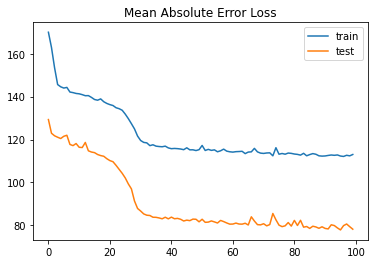

In [15]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 2

In [16]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [17]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [18]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 5ms/step - loss: 170.0228 - mean_absolute_error: 165.5381 - val_loss: 129.2318 - val_mean_absolute_error: 127.9128
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 161.6385 - mean_absolute_error: 160.4234 - val_loss: 121.6557 - val_mean_absolute_error: 119.9536
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 147.7813 - mean_absolute_error: 145.4513 - val_loss: 120.5961 - val_mean_absolute_error: 118.0106
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 143.4619 - mean_absolute_error: 140.9716 - val_loss: 119.8289 - val_mean_absolute_error: 117.3483
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 143.6233 - mean_absolute_error: 141.2238 - val_loss: 118.4035 - val_mean_absolute_error: 116.0250
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 142.3649 - mean_absolute_error: 139.8825 - val_loss: 119.3285 - val_mean

63/63 [==============================] - 0s 3ms/step - loss: 114.7180 - mean_absolute_error: 110.9499 - val_loss: 81.9265 - val_mean_absolute_error: 78.1513
Epoch 50/100
63/63 [==============================] - 0s 3ms/step - loss: 114.4174 - mean_absolute_error: 110.6781 - val_loss: 82.5331 - val_mean_absolute_error: 78.7833
Epoch 51/100
63/63 [==============================] - 0s 3ms/step - loss: 114.7100 - mean_absolute_error: 111.0027 - val_loss: 83.1712 - val_mean_absolute_error: 79.4341
Epoch 52/100
63/63 [==============================] - 0s 3ms/step - loss: 114.3272 - mean_absolute_error: 110.6452 - val_loss: 80.7555 - val_mean_absolute_error: 77.1185
Epoch 53/100
63/63 [==============================] - 0s 3ms/step - loss: 114.4838 - mean_absolute_error: 110.8131 - val_loss: 81.2393 - val_mean_absolute_error: 77.6137
Epoch 54/100
63/63 [==============================] - 0s 3ms/step - loss: 114.5292 - mean_absolute_error: 110.9009 - val_loss: 80.8650 - val_mean_absolute_error: 7

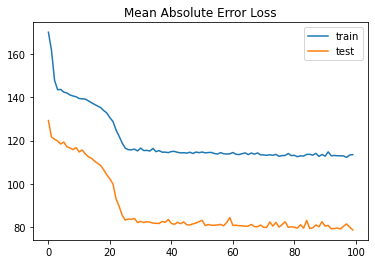

In [19]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 3

In [20]:
#mean_squared_logarithmic_error
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [21]:
classifier.compile(optimizer='adam',loss='mean_squared_logarithmic_error',metrics=['mse'])

In [22]:
history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 6ms/step - loss: 18.3420 - mse: 94612.2422 - val_loss: 10.3158 - val_mse: 64329.6641
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 8.5974 - mse: 90138.3047 - val_loss: 6.7486 - val_mse: 59016.3008
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 6.6669 - mse: 86283.5625 - val_loss: 6.1350 - val_mse: 57348.9805
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 6.1671 - mse: 84453.8594 - val_loss: 5.6721 - val_mse: 56906.6289
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 5.8919 - mse: 83899.2266 - val_loss: 5.5744 - val_mse: 56254.4297
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 5.6679 - mse: 83495.9375 - val_loss: 5.3637 - val_mse: 55718.9258
Epoch 7/100
63/63 [==============================] - 0s 3ms/step - loss: 5.5281 - mse: 83324.8828 - val_loss: 5.1747 - val_mse: 55288.6133
Epoch 8/100
63/63 [======

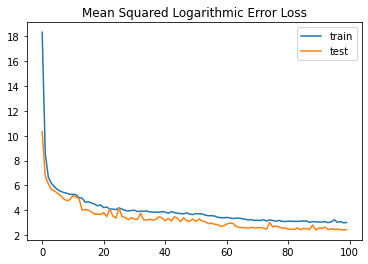

In [23]:
# plot loss during training
plt.title('Mean Squared Logarithmic Error Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 4

In [24]:
# define model for MSE Loss
#mean_squared_error
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [25]:
classifier.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

In [26]:
history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=10,epochs=100)

Epoch 1/100
100/100 [==============================] - 1s 5ms/step - loss: 91243.2109 - mse: 91236.5781 - val_loss: 47079.2227 - val_mse: 47069.9688
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 61317.4180 - mse: 61306.2578 - val_loss: 41285.1562 - val_mse: 41273.7930
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 59866.5664 - mse: 59855.2305 - val_loss: 40346.0039 - val_mse: 40334.8047
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 59371.1133 - mse: 59359.5664 - val_loss: 40183.6758 - val_mse: 40172.1406
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 58913.8242 - mse: 58902.0547 - val_loss: 40044.5547 - val_mse: 40032.8047
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 58423.4648 - mse: 58411.5742 - val_loss: 40305.5586 - val_mse: 40293.2695
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 58072.1914 - mse: 58059.7891 - 

Epoch 56/100
100/100 [==============================] - 0s 2ms/step - loss: 41776.8242 - mse: 41756.5312 - val_loss: 27517.3379 - val_mse: 27497.0781
Epoch 57/100
100/100 [==============================] - 0s 3ms/step - loss: 41735.4688 - mse: 41715.1367 - val_loss: 25834.6660 - val_mse: 25814.4629
Epoch 58/100
100/100 [==============================] - 0s 3ms/step - loss: 41329.6641 - mse: 41309.3906 - val_loss: 27949.1211 - val_mse: 27928.8184
Epoch 59/100
100/100 [==============================] - 0s 3ms/step - loss: 41627.3750 - mse: 41607.0664 - val_loss: 27762.6250 - val_mse: 27742.3145
Epoch 60/100
100/100 [==============================] - 0s 2ms/step - loss: 41569.1055 - mse: 41548.8633 - val_loss: 29998.1738 - val_mse: 29977.8848
Epoch 61/100
100/100 [==============================] - 0s 2ms/step - loss: 41248.9375 - mse: 41228.6953 - val_loss: 29816.0176 - val_mse: 29795.6816
Epoch 62/100
100/100 [==============================] - 0s 2ms/step - loss: 41836.1484 - mse: 41815.

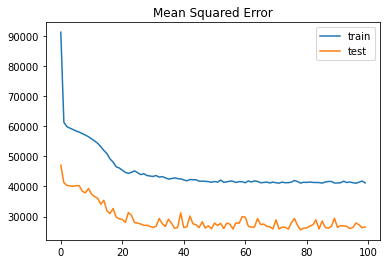

In [27]:
# plot loss during training
plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()